In [19]:
# package library for neural network algorithm TENSORFLOW
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D, LSTM
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec, KeyedVectors
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
# import tensorflow.keras.backend as kb
import numpy as np
import pandas as pd
import string

import csv
from nltk.util import ngrams
from datetime import datetime
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import string
import math
import gensim
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def importData():
    train = pd.read_csv('dimsum16.train.csv')
    train = train.drop(['Column7'],axis=1)
    # train = train.append({'Column1':np.nan,'Column2':np.nan,'Column3':np.nan,'Column4':np.nan,'Column5':np.nan,'Column6':np.nan,'Column8':np.nan,'Column9':np.nan},ignore_index=True)
    train['Column4'].unique()
    train['pos'] = train['Column4'].map({'NOUN':1,'VERB':2,'ADP':3,'PROPN':4,'PUNCT':5,'X':6,'ADJ':6,'NUM':7,
                                         'DET':8,'ADV':9,'CONJ':10,'PRON':11,'PART':12,'AUX':13,'O':14,'o':15,'SCONJ':16,'SYM':17})
    test = pd.read_csv('dimsum16.test.csv')
    test = test.drop(['Column7'],axis=1)
    # test['Column4'].unique()
    test['pos'] = test['Column4'].map({'NOUN':1,'VERB':2,'ADP':3,'PROPN':4,'PUNCT':5,'X':6,'ADJ':6,'NUM':7,
                                         'DET':8,'ADV':9,'CONJ':10,'PRON':11,'PART':12,'AUX':13,'O':14,'o':15,'SCONJ':16,'SYM':17,'B':18})
    return train,test

train,test=importData()
train

,Column1,Column2,Column3,Column4,Column5,Column6,Column8,Column9,pos
0,1.0,Security,security,NOUN,O,0.0,n.state,lowlands-1,1.0
1,2.0,increased,increase,VERB,O,0.0,v.change,lowlands-1,2.0
2,3.0,in,in,ADP,O,0.0,NaN,lowlands-1,3.0
3,4.0,Mumbai,mumbai,PROPN,O,0.0,n.location,lowlands-1,4.0
4,5.0,amid,amid,ADP,O,0.0,NaN,lowlands-1,3.0
...,...,...,...,...,...,...,...,...,...
78620,2.0,highly,highly,ADV,O,0.0,NaN,ewtb.r.397066.5,9.0
78621,3.0,recommend,recommend,VERB,O,0.0,v.communication,ewtb.r.397066.5,2.0
78622,4.0,her,her,PRON,O,0.0,NaN,ewtb.r.397066.5,11.0
78623,5.0,.,.,PUNCT,O,0.0,NaN,ewtb.r.397066.5,5.0


In [3]:
test = pd.read_csv('dimsum16.test.csv')
test = test.drop(['Column7'],axis=1)
# test['Column4'].unique()
test['pos'] = test['Column4'].map({'NOUN':1,'VERB':2,'ADP':3,'PROPN':4,'PUNCT':5,'X':6,'ADJ':6,'NUM':7,
                                     'DET':8,'ADV':9,'CONJ':10,'PRON':11,'PART':12,'AUX':13,'O':14,'o':15,'SCONJ':16,'SYM':17,'B':18})
test

,Column1,Column2,Column3,Column4,Column5,Column6,Column8,Column9,pos
0,1.0,@JoJoLyrics,@USER,X,O,0.0,NaN,tweebank.298,6.0
1,2.0,I,i,PRON,O,0.0,NaN,tweebank.298,11.0
2,3.0,hear,hear,VERB,O,0.0,v.perception,tweebank.298,2.0
3,4.0,enough,enough,ADV,O,0.0,NaN,tweebank.298,9.0
4,5.0,talking,talk,VERB,O,0.0,v.communication,tweebank.298,2.0
...,...,...,...,...,...,...,...,...,...
17495,5.0,at,at,ADP,B,0.0,NaN,tweebank.115,3.0
17496,6.0,all,all,DET,I,5.0,NaN,tweebank.115,8.0
17497,7.0,!!,!!,PUNCT,O,0.0,NaN,tweebank.115,5.0
17498,8.0,#notwinning,#notwinning,X,O,0.0,NaN,tweebank.115,6.0


<h3><b>Traditional Machine Learning Algorithm</b></h3>
<h4>KNN classifier</h4>
<h4>Random Forest</h4>
<h4>Gradient Boosting</h4>
<h4>Logistic Regression</h4>

In [3]:
def get_from_wordIndex(val,word_index):
  # parameters val=integer indicating position of word in word index
  # convert word index (number) to its corresponding word
  # output corresponding vocabs given the position of word index
    for key,value in word_index.items():
        if val == value:
            return key

def combineAllSentences(train):
    # parameter train=dataframe of imported data
    # function combining every tokens in the list to become one sentences
    # output a long sentence combining all words in datasets
    text=''
    for x in range(len(train)):
        if not np.isnan(train['Column1'].iloc[x]):
            text = text+train['Column3'].iloc[x]+" "
    text=[text]
    return text

def combineRespectiveSentences(train):
  # parameter train=dataframe of imported data
  # function putting each token back to their own sentences
  # output tarr=lists of all sentences in dataframe, id=sentence id
    temp=''
    tarr=[]
    tinarr=[]
#     id=[]
    for x in range(len(train)):
        if np.isnan(train['Column1'].iloc[x]):
            temp=temp[:-1]
            tinarr.append(temp)
            tarr.append(tinarr)
#             id.append(train['Column9'].iloc[x-1])
            tinarr=[]
            temp=''
        else:
            temp=temp+str(train['Column3'].iloc[x])+" "
    for x in tarr:
        for y in x[0]:
            if y in string.punctuation:
                x[0]=x[0].replace(y,'')
    return tarr

def convertCombineSentenceToWordIndex(text):
  # create token object and word index
  # output tokenizer=tokenizer object, word_index=dictionary of words with number labelling
    tokenizer = Tokenizer(oov_token="<oov>")
    tokenizer.fit_on_texts(text)
    word_index = tokenizer.word_index
    return tokenizer, word_index

# SET NUMBER OF SENTENCE TO BE PROCESS AT THIS FUNCTION
# def createSkipGram(skipgramList,word_index,tarr,tokenizer,train):
#   # parameter skipgramList=self create dataframe, id=id of sentences get from imported journal dataframe
#   # convert to sequence and create skip gram list
#   # output self construct dataframe consisting bigram skipgrams, its numbering, sentence id of first context word, and indication whether is mwe
#     for x in range(len(tarr[:50])):
#         starr = tokenizer.texts_to_sequences(tarr[x])
#         # skip gram parameters: vo_size - number of unique word index, window_size - sampling window size, 
#         skipgram,_ = tf.keras.preprocessing.sequence.skipgrams(
#             starr[0],vocabulary_size=len(word_index),window_size=1
#         # ,negative_samples=5.0
#         )
#         for y in range(len(skipgram)):
#             temp1=get_from_wordIndex(int(skipgram[y][0]),word_index)
#             temp2=get_from_wordIndex(int(skipgram[y][1]),word_index)
# #             skipgramList.loc[len(skipgramList)] = [skipgram[y][0],skipgram[y][1],temp1,temp2,0]
#             skipgramList=skipgramList.append({'cw1':skipgram[y][0],'cw2':skipgram[y][1],'cww1':temp1,'cww2':temp2,'mwe':0},ignore_index=True)
#     return skipgramList

def createSkipGram(skipgramList,tarr):
#     parameter skipgramLIst=self create dataframe, tarr=2d array of sentence
# convert to bi/tri/quad gram
#  output self construct dataframe consisting bigram skipgrams, and indication whether is mwe
    for x in range(len(tarr)):
        spl=ngrams(tarr[x][0].split(),2)
        for grams in spl:
            skipgramList=skipgramList.append({'cww1':grams[0],'cww2':grams[1],'mwe':0},ignore_index=True)
        spl=ngrams(tarr[x][0].split(),3)
        for grams in spl:
            skipgramList=skipgramList.append({'cww1':grams[0],'cww2':grams[1],'cww3':grams[2],'mwe':0},ignore_index=True)
        spl=ngrams(tarr[x][0].split(),4)
        for grams in spl:
            skipgramList=skipgramList.append({'cww1':grams[0],'cww2':grams[1],'cww3':grams[2],'cww4':grams[3],'mwe':0},ignore_index=True)
    return skipgramList

# def identifyPosTag(train,word):
#     # parameter word=receive input word to know its respective pos tag, train=provided datasets by journal
#     # retrieve each word pos tag
#     # output respective pos tag label with number
#     a=train[train.Column3==word].pos
#     if a.empty:
#         a=train[train.Column2==word].pos
#         if a.empty:
#             a=0.0
#         else:
#             a=a.iloc[0]
#     else:
#         a=a.iloc[0]
#     return a

def extractGoldStandardMWE(train):
  # parameters train=dataframe of journal
  # get annotated MWE from journal
  # output list of mwe annotated from the journal dataframe
    temp=''
    tempb=''
    goldMWE=[]
    for x in range(len(train)):
        if train['Column5'].iloc[x] == 'B':
            temp=temp+train['Column3'].iloc[x]+" "
        elif train['Column5'].iloc[x] == 'I':
            temp=temp+train['Column3'].iloc[x]+" "
            if train['Column5'].iloc[x+1]=="O" or train['Column5'].iloc[x+1]=="B" or train['Column5'].iloc[x+1] == np.nan:
                temp=temp[:-1]
                goldMWE.append(temp)
                temp=''
        elif train['Column5'].iloc[x] == 'b':
            tempb=tempb+train['Column3'].iloc[x]+" "
        elif train['Column5'].iloc[x] == 'i':
            tempb=tempb+train['Column3'].iloc[x]+" "
            if train['Column5'].iloc[x+1] is not 'i':
                tempb=tempb[:-1]
                goldMWE.append(tempb)
                temp=''
    return goldMWE

def verifyMWE(skipgramList,goldMWE):
  # parameters skipgramList=self construct dataframe of skipgrams, goldMWE=list of annotated mwe obtain from journal
  # check if skipgrams extracted is MWE or not, compare with annotated mwe
  # output label self construct dataframe whether each bigram is mwe
    for x in range(len(skipgramList)):
        temp = skipgramList['cww1'].iloc[x]+" "+skipgramList['cww2'].iloc[x]
        if skipgramList['cww3'].iloc[x] is not np.nan:
            temp += " "+skipgramList['cww3'].iloc[x]
            if skipgramList['cww4'].iloc[x] is not np.nan:
                temp += " "+skipgramList['cww4'].iloc[x]
        if temp in goldMWE:
            skipgramList['mwe'].iloc[x]=1
        temp=''
    return skipgramList

def tokenizeData(tarr):
  # parameters tarr=2d list consists of sentences from journal
  # convert data into tokenized words in sentence. Eg [['a','b','f','e'],['w','a','w','h']]
  # output list of tokenize sentence in dataframe
    data=[]
    for x in tarr:
        temp=[]
        for y in x:
            temp=y.split()
            for z in temp:
                if z in string.punctuation:
                    temp.remove(z)
        data.append(temp)
    return data

def constructingData(train):
    text=combineAllSentences(train)
    tarr=combineRespectiveSentences(train)
    tokenizer, word_index = convertCombineSentenceToWordIndex(text)
    data=tokenizeData(tarr)
    goldMWE=extractGoldStandardMWE(train)
    skipgramList=pd.DataFrame(columns=['cw1','cw2','cww1','cww2','cww3','cww4','mwe'])
#     skipgramList=createSkipGram(skipgramList,word_index,tarr,tokenizer,train)
    skipgramList=createSkipGram(skipgramList,tarr)
    skipgramList=verifyMWE(skipgramList,goldMWE)
    return text,tarr,word_index,data,goldMWE,skipgramList

print('Time of start data processing: ',datetime.now())
trainText,trainTarr,trainWord_index,trainData,trainGoldMWE,trainSkipgramList=constructingData(train)
print(trainText)
print('Length of text is ',len(trainText),'\n')
print(trainWord_index)
print('Length of word index is: ',len(trainWord_index),'\n')
print(trainTarr)
print('Length of tarr is ',len(trainTarr),'\n')
print(trainData)
print('Length of data is: ',len(trainData),'\n')
print(trainGoldMWE)
print('Length of golden mmwe is ',len(trainGoldMWE),'\n')
trainSkipgramList.loc[trainSkipgramList['mwe']==1]
print(trainSkipgramList)

print('---------------------------------------------------------------')
testText,testTarr,testWord_index,testData,testGoldMWE,testSkipgramList=constructingData(test)
print(testText)
print('Length of text is ',len(testText),'\n')
print(testWord_index)
print('Length of word index is: ',len(testWord_index),'\n')
print(testTarr)
print('Length of tarr is ',len(testTarr),'\n')
print(testData)
print('Length of data is: ',len(testData),'\n')
print(testGoldMWE)
print('Length of golden mmwe is ',len(testGoldMWE),'\n')
testSkipgramList.loc[testSkipgramList["mwe"]==1]
print('Time of end data processing: ',datetime.now())
print(testSkipgramList)
# testSkipgramList
# model = Word2Vec(sentences=data,min_count=1,size=100)
# print('word embeddings model: ',model)
# array that shows distinguish vocabs
# words = list(model.wv.vocab)
# print(words)
# print(model['terror'])
# model.most_similar('terror')

<>:122: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:122: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-3-b6a6b0c3420f>:122: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if train['Column5'].iloc[x+1] is not 'i':


Time of start data processing:  2021-04-19 10:21:57.314971
['security increase in mumbai amid terror threat ahead of ganeshotsav : police URL magic key security locksmith save ? NUMBER on all book services with @USER URL @USER #hnic #hnic hamsik vow to challenge for title with napoli : the slovakia international be in ... URL on @USER be your cat safe from disease just because he get a vaccine ? it depend . find out why URL i post a new photo to facebook URL european study find megaupload closure help blockbusters , hurt smaller pic : researcher from the munich sc ... URL NUMBER challenge : move a mile a day #getmefit2 URL URL messi , who be recover from a thigh muscle injury , rejoin the group on training today URL whatever your sexual fantasy @USER have probably write about it URL check out his hot & sexy short story . @USER checkout & share new single @USER & @USER - playtime URL #ripmucho #doit4mucho #freekush be you on google+ ? if you be , make sure to follow @USER ! URL \' manue

        cw1  cw2       cww1       cww2       cww3 cww4 mwe
0       NaN  NaN   security   increase        NaN  NaN   0
1       NaN  NaN   increase         in        NaN  NaN   0
2       NaN  NaN         in     mumbai        NaN  NaN   0
3       NaN  NaN     mumbai       amid        NaN  NaN   0
4       NaN  NaN       amid     terror        NaN  NaN   0
...     ...  ...        ...        ...        ...  ...  ..
168009  NaN  NaN     highly  recommend        NaN  NaN   0
168010  NaN  NaN  recommend        her        NaN  NaN   0
168011  NaN  NaN          i     highly  recommend  NaN   0
168012  NaN  NaN     highly  recommend        her  NaN   0
168013  NaN  NaN          i     highly  recommend  her   0

[168014 rows x 7 columns]
---------------------------------------------------------------
['@USER i hear enough talk , just turn round keep walk haha in that part photo : URL ahh . flute sound really bad with cheap mics . write a song now , just need chord and i\'ll be good . bye EMOTICON w

In [4]:
def convertIndexToEmbeddings(dataframe,data,word_index,dimension):
    print('Start embedding process time: ',datetime.now())
#     model = Word2Vec(data, min_count=1, size=100)
    model = Word2Vec(min_count=1,sg=1,window=1,size=dimension)
    model.build_vocab(data)
    model.train(data,epochs=1000,total_examples=model.corpus_count)
#     x=pd.DataFrame(columns=['we1','we2'])
    x=[]
    y=dataframe['mwe']
    print('Mid embedding process time: ',datetime.now())
    for a in range(len(dataframe)):
        try:
            temp1=model[dataframe['cww1'].iloc[a]]
        except:
            temp1=np.zeros(dimension)
        try:
            temp2=model[dataframe['cww2'].iloc[a]]
        except:
            temp2=np.zeros(dimension)
        try:
            temp3=model[dataframe['cww3'].iloc[a]]
        except:
            temp3=np.zeros(dimension)
        try:
            temp4=model[dataframe['cww4'].iloc[a]]
        except:
            temp4=np.zeros(dimension)
        t=np.concatenate([temp1,temp2,temp3,temp4])
        x.append(t)
#         x=x.append({'we1':temp1,'we2':temp2},ignore_index=True)
    x=np.asarray(x)
    y=np.asarray(y)
    y=y.astype('int')
    # x=x.astype({'pos1':'float64','pos2':'float64'})
    print('End of embedding process time: ',datetime.now())
    return x,y

xtrain, ytrain = convertIndexToEmbeddings(trainSkipgramList,trainData,trainWord_index,50)
xtest, ytest = convertIndexToEmbeddings(testSkipgramList,testData,testWord_index,50)

Start embedding process time:  2021-04-19 16:21:58.875988
Mid embedding process time:  2021-04-19 16:24:49.828972


<ipython-input-4-8e8f42819a8b>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  temp1=model[dataframe['cww1'].iloc[a]]
<ipython-input-4-8e8f42819a8b>:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  temp2=model[dataframe['cww2'].iloc[a]]
<ipython-input-4-8e8f42819a8b>:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  temp3=model[dataframe['cww3'].iloc[a]]
<ipython-input-4-8e8f42819a8b>:25: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  temp4=model[dataframe['cww4'].iloc[a]]


End of embedding process time:  2021-04-19 16:26:09.050356
Start embedding process time:  2021-04-19 16:26:09.059369
Mid embedding process time:  2021-04-19 16:27:25.349344
End of embedding process time:  2021-04-19 16:27:44.402404


In [5]:
len(xtrain[0])

200

In [6]:
def addSyntheticData(xtrain,xtest,ytrain,ytest):
# train,test input and validation data
# add synthetic data with SMOTE
# return arrays of new set of synthetic data
    xtrainSmote=pd.DataFrame(xtrain)
    xtestSmote=pd.DataFrame(xtest)
    ytrainSmote=pd.DataFrame(ytrain)
    ytestSmote=pd.DataFrame(ytest)
    xtrainSmote=pd.concat([xtrainSmote,xtestSmote],axis=0)
    ytrainSmote=pd.concat([ytrainSmote,ytestSmote],axis=0)
    smote=SMOTE(sampling_strategy='minority')
    xtrainSmote,ytrainSmote=smote.fit_sample(xtrainSmote,ytrainSmote)
    xtrainSmote,xtestSmote,ytrainSmote,ytestSmote=train_test_split(xtrainSmote,ytrainSmote,test_size=0.2,shuffle=True)
    xtrainSmote=np.asarray(xtrainSmote)
    xtestSmote=np.asarray(xtestSmote)
    ytrainSmote=np.asarray(ytrainSmote)
    ytestSmote=np.asarray(ytestSmote)
    return xtrainSmote,xtestSmote,ytrainSmote,ytestSmote

xtrainSmote,xtestSmote,ytrainSmote,ytestSmote=addSyntheticData(xtrain,xtest,ytrain,ytest)

<h3>Traditional machine learning algorithm</h3>

In [7]:
def knnClassifier(xtrain,ytrain):
    # KNN Classifier
    knnClassifier = KNeighborsClassifier(n_neighbors=3,weights='distance',)
    knnClassifier.fit(xtrain,ytrain)
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    knnScores = cross_val_score(knnClassifier, xtrain, ytrain, scoring='f1', cv=skf)
    print('Cross validation F1 score: ',knnScores)
    print('Mean of cross validation F1 score: ',knnScores.mean())
    return knnClassifier

def randomForestClassifier(xtrain,ytrain):
    #  RandomForest Classifier
    rfClassifier = RandomForestClassifier(n_estimators=100,class_weight={1:1.2,0:1})
    # y_train=to_categorical(ytrain)
    rfClassifier.fit(xtrain,ytrain)
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    rfScores = cross_val_score(rfClassifier, xtrain, ytrain, scoring='f1', cv=skf)
    print('Cross validation f1 score: ',rfScores)
    print('Mean of cross validation F1 score: ',rfScores.mean())
    return rfClassifier

def logisticRegressionClassifier(xtrain,ytrain):
    # Logistic Regressio
    print("Logistic Regression classifier start processing: ",datetime.now())
    lrClassifier = LogisticRegression(penalty='l2',C=0.5)
    lrClassifier.fit(xtrainSmote,ytrainSmote)
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    lrScores = cross_val_score(lrClassifier, xtrain, ytrain, scoring='f1', cv=skf)
    print('Cross validation F1 score',lrScores)
    print('Mean of cross validation F1 score',lrScores.mean())
    return lrClassifier

def gradientBoostingClassifier(xtrain,ytrain):
    # Gradient Boosting
    gbClassifier = GradientBoostingClassifier(max_depth=13,n_estimators=100,)
    gbClassifier.fit(xtrain,ytrain)
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    gbScores = cross_val_score(gbClassifier, xtrain, ytrain, scoring='f1', cv=skf)
    print('Cross validation F1 score: ',gbScores)
    print('Mean of cross validation F1 score: ',gbScores.mean())
    return gbClassifier

def supportVectorMachineClassifier(xtrain,ytrain):
    # Support vector machine
    svmClassifier = SVC()
    svmClassifier.fit(xtrain,ytrain)
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    svmScores = cross_val_score(svmClassifier, xtrain, ytrain, scoring='f1', cv=skf)
    print('Cross validation F1 score: ',svmScores)
    print('Mean of cross validation F1 score: ',svmScores.mean())
    return svmClassifier

def classifierScore(ypred,ytest):
    fscore=metrics.f1_score(ytest,ypred)
    cMatrix=confusion_matrix(ytest,ypred)
    print('F1 score comparing ytest & ypredict: ',metrics.f1_score(ytest,ypred))
    print('\n Confusion matrix: \n',confusion_matrix(ytest,ypred))
    return fscore,cMatrix
    
def plotConfusionMatrix(model,xtest,ytest):
  # rfClassifier = train random forest classifier, xtest,ytest = input and validation data
  # plot a confusion matrix graph
    matrix=plot_confusion_matrix(model,xtest,ytest)
    matrix.ax_.set_title('Confusion matrix of predicted multiword expressions',color='black')
    plt.xlabel('Predicted MWE label',color='black')
    plt.ylabel('True MWE label',color='black')
    plt.gcf().axes[0].tick_params(colors='black')
    plt.gcf().axes[1].tick_params(colors='black')
    plt.gcf().set_size_inches(10,6)
    plt.show()

def lollipop(score,label,x,y,title):
# score=array of f-scores, label=array of labels for each f-scores, x=name for x-axis, y=name for y-axis, title=name for the graph
# plot lollipop graph
# plot graph without return
    plt.stem(label,score)
    plt.ylim(0,1.1)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show()

<h3>KNN Classifier</h3>

In [8]:
print("Start processing: ",datetime.now())
knnClassifier=knnClassifier(xtrainSmote,ytrainSmote)
knnYpred=knnClassifier.predict(xtestSmote)
print("End processing: ",datetime.now())

knnFscore,knnCMatrix=classifierScore(knnYpred,ytestSmote)


Start processing:  2021-04-19 16:46:45.812354


<ipython-input-7-22b898dd5478>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnClassifier.fit(xtrain,ytrain)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Cross validation F1 score:  [0.97248459 0.97149618 0.97109844 0.97115735 0.97199666]
Mean of cross validation F1 score:  0.9716466439230766
End processing:  2021-04-20 08:01:21.639992
F1 score comparing ytest & ypredict:  0.9775675113996161

 Confusion matrix: 
 [[38217  1835]
 [    0 39983]]


<h3>Random Forest</h3>

In [9]:
print("Start processing: ",datetime.now())
rfClassifier=randomForestClassifier(xtrainSmote,ytrainSmote)
rfYpred=rfClassifier.predict(xtestSmote)
print("End processing: ",datetime.now())6

rfFscore,rfCMatrix=classifierScore(rfYpred,ytestSmote)


Start processing:  2021-04-20 08:01:23.328709


<ipython-input-7-22b898dd5478>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfClassifier.fit(xtrain,ytrain)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Cross validation f1 score:  [0.99441115 0.99446052 0.99461412 0.99473766 0.99493825]
Mean of cross validation F1 score:  0.9946323387068674
End processing:  2021-04-20 08:30:46.621808
F1 score comparing ytest & ypredict:  0.9958592132505175

 Confusion matrix: 
 [[39780   272]
 [   60 39923]]


<h3>Logistic regression</h3>

In [10]:
print("Start processing: ",datetime.now())
lrClassifier=logisticRegressionClassifier(xtrainSmote,ytrainSmote)
lrYpred=lrClassifier.predict(xtestSmote)
print("End processing: ",datetime.now())

lrFscore,lrCMatrix=classifierScore(lrYpred,ytestSmote)


Start processing:  2021-04-20 08:30:47.113076
Logistic Regression classifier start processing:  2021-04-20 08:30:47.114112


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

Cross validation F1 score [0.81005937 0.81298448 0.80732986 0.80969182 0.81121457]
Mean of cross validation F1 score 0.8102560208970887
End processing:  2021-04-20 08:31:20.968256
F1 score comparing ytest & ypredict:  0.8108593485790253

 Confusion matrix: 
 [[29050 11002]
 [ 5217 34766]]


<h3>Gradient boosting</h3>

In [11]:
print("Start processing: ",datetime.now())
gbClassifier=gradientBoostingClassifier(xtrainSmote,ytrainSmote)
gbYpred=gbClassifier.predict(xtestSmote)
print("End processing: ",datetime.now())

gbFscore,gbCMatrix=classifierScore(gbYpred,ytestSmote)


Start processing:  2021-04-20 08:31:21.428025


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

Cross validation F1 score:  [0.99191132 0.99112656 0.99216094 0.99143549 0.99159195]
Mean of cross validation F1 score:  0.9916452496998438
End processing:  2021-04-20 17:24:28.262379
F1 score comparing ytest & ypredict:  0.9934799920366315

 Confusion matrix: 
 [[39589   463]
 [   61 39922]]


<h3>Support vector machine</h3>

In [12]:
print("Start processing: ",datetime.now())
svmClassifier=supportVectorMachineClassifier(xtrainSmote,ytrainSmote)
svmYpred=svmClassifier.predict(xtestSmote)
print("End processing: ",datetime.now())

svmFscore,svmCMatrix=classifierScore(svmYpred,ytestSmote)


Start processing:  2021-04-20 17:39:17.396467


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

Cross validation F1 score:  [0.98497804 0.98469356 0.9854036  0.984541   0.9854081 ]
Mean of cross validation F1 score:  0.9850048609082747
End processing:  2021-04-22 03:25:20.005795
F1 score comparing ytest & ypredict:  0.9881159957954615

 Confusion matrix: 
 [[39122   930]
 [   31 39952]]


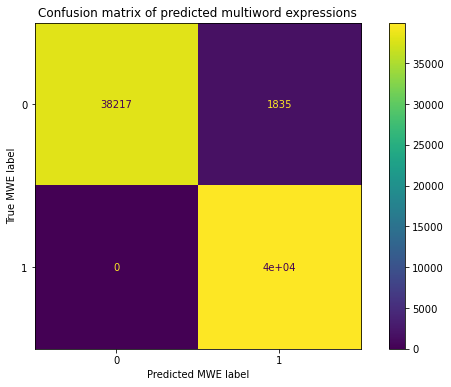

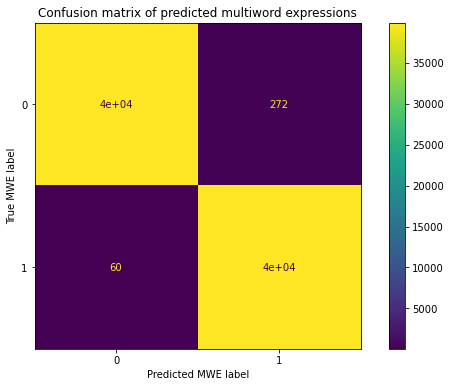

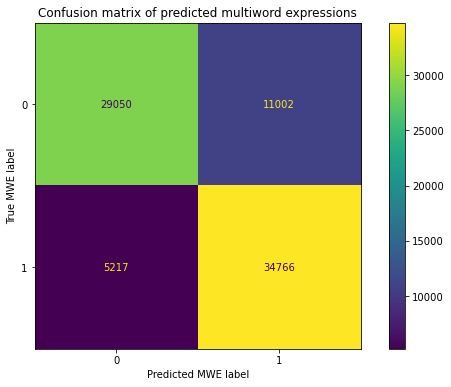

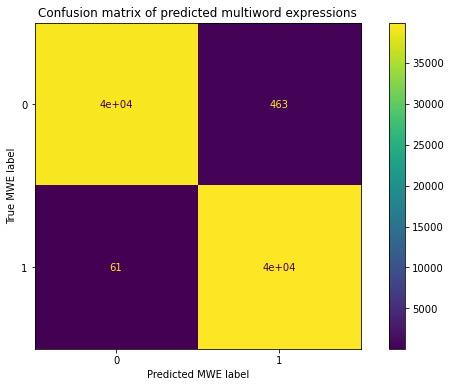

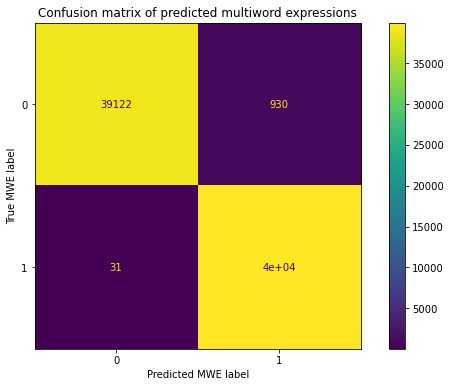

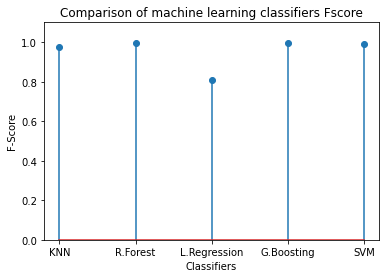

In [13]:
plotConfusionMatrix(knnClassifier,xtestSmote,ytestSmote)
plotConfusionMatrix(rfClassifier,xtestSmote,ytestSmote)
plotConfusionMatrix(lrClassifier,xtestSmote,ytestSmote)
plotConfusionMatrix(gbClassifier,xtestSmote,ytestSmote)
plotConfusionMatrix(svmClassifier,xtestSmote,ytestSmote)

lollipop([knnFscore,rfFscore,lrFscore,gbFscore,svmFscore],['KNN','R.Forest','L.Regression','G.Boosting','SVM'],'Classifiers','F-Score','Comparison of machine learning classifiers Fscore')

In [25]:
def writeToCSV(knnClassifier,rfClassifier,lrClassifier,gbClassifier,svmClassifier,xtrain,xtest,trainSkipgramList,testSkipgramList):
    # all machine learning Classifiers, x/y train/test = input and validation data, skipgramList = dataframes of tokens
    # write predictions of every machine learning algorithm into CSV file
    # 
        xdata=np.concatenate((xtrain,xtest))
        #lfnCVP=lfnModel.predict(xdata)
        skipgramList=trainSkipgramList.append(testSkipgramList)
        
        for x in range(len(skipgramList)):
            temp=[skipgramList['cww1'].iloc[x],skipgramList['cww2'].iloc[x]]
            if skipgramList['cww3'].iloc[x] is not np.nan:
                temp.append(skipgramList['cww3'].iloc[x])
                if skipgramList['cww4'].iloc[x] is not np.nan:
                    temp.append(skipgramList['cww4'].iloc[x])
            ypred=knnClassifier.predict([xdata[x]])
            if ypred[0]==1:
                with open('knn_classifier_mwe.csv','a',newline='',encoding='utf-8') as myfile:
                    writer=csv.writer(myfile)
                    writer.writerow(temp)
            else:
                with open('knn_classifier_Non_mwe.csv','a',newline='',encoding='utf-8') as myfile:
                    writer=csv.writer(myfile)
                    writer.writerow(temp)

            ypred=rfClassifier.predict([xdata[x]])
            if ypred[0]==1:
                with open('random_forest_mwe.csv','a',newline='',encoding='utf-8') as myfile:
                    writer=csv.writer(myfile)
                    writer.writerow(temp)
            else:
                with open('random_forest_Non_mwe.csv','a',newline='',encoding='utf-8') as myfile:
                    writer=csv.writer(myfile)
                    writer.writerow(temp)

            ypred=lrClassifier.predict([xdata[x]])
            if ypred[0]==1:
                with open('logistic_regression_mwe.csv','a',newline='',encoding='utf-8') as myfile:
                    writer=csv.writer(myfile)
                    writer.writerow(temp)
            else:
                with open('logistic_regression_Non_mwe.csv','a',newline='',encoding='utf-8') as myfile:
                    writer=csv.writer(myfile)
                    writer.writerow(temp)

            ypred=gbClassifier.predict([xdata[x]])
            if ypred[0]==1:
                with open('gradient_boosting_mwe.csv','a',newline='',encoding='utf-8') as myfile:
                    writer=csv.writer(myfile)
                    writer.writerow(temp)
            else:
                 with open('gradient_boosting_Non_mwe.csv','a',newline='',encoding='utf-8') as myfile:
                    writer=csv.writer(myfile)
                    writer.writerow(temp)

            ypred=svmClassifier.predict([xdata[x]])
            if ypred[0]==1:
                with open('support_vector_machine_mwe.csv','a',newline='',encoding='utf-8') as myfile:
                    writer=csv.writer(myfile)
                    writer.writerow(temp)
            else:
                with open('support_vector_machine_Non_mwe.csv','a',newline='',encoding='utf-8') as myfile:
                    writer=csv.writer(myfile)
                    writer.writerow(temp)
writeToCSV(knnClassifier,rfClassifier,lrClassifier,gbClassifier,svmClassifier,xtrain,xtest,trainSkipgramList,testSkipgramList)

['security', 'increase', 'in', 'mumbai']
['increase', 'in', 'mumbai', 'amid']
['in', 'mumbai', 'amid', 'terror']
['mumbai', 'amid', 'terror', 'threat']
['amid', 'terror', 'threat', 'ahead']
['terror', 'threat', 'ahead', 'of']
['threat', 'ahead', 'of', 'ganeshotsav']
['ahead', 'of', 'ganeshotsav', 'police']
['of', 'ganeshotsav', 'police', 'URL']
['magic', 'key', 'security', 'locksmith']
['key', 'security', 'locksmith', 'save']
['security', 'locksmith', 'save', 'NUMBER']
['locksmith', 'save', 'NUMBER', 'on']
['save', 'NUMBER', 'on', 'all']
['NUMBER', 'on', 'all', 'book']
['on', 'all', 'book', 'services']
['all', 'book', 'services', 'with']
['book', 'services', 'with', 'USER']
['services', 'with', 'USER', 'URL']
['with', 'USER', 'URL', 'USER']
['hnic', 'hnic', 'hamsik', 'vow']
['hnic', 'hamsik', 'vow', 'to']
['hamsik', 'vow', 'to', 'challenge']
['vow', 'to', 'challenge', 'for']
['to', 'challenge', 'for', 'title']
['challenge', 'for', 'title', 'with']
['for', 'title', 'with', 'napoli']
['t

['in', 'oxford', 'last', 'week']
['oxford', 'last', 'week', 'be']
['last', 'week', 'be', 'magical']
['week', 'be', 'magical', 'listen']
['be', 'magical', 'listen', 'to']
['magical', 'listen', 'to', 'the']
['listen', 'to', 'the', 'hourlong']
['to', 'the', 'hourlong', 'podcast']
['the', 'hourlong', 'podcast', 'here']
['hourlong', 'podcast', 'here', 'URL']
['kdawg', 'i', 'can', 'cook']
['i', 'can', 'cook', 'bit']
['can', 'cook', 'bit', 'i']
['cook', 'bit', 'i', 'cant']
['bit', 'i', 'cant', 'operate']
['i', 'cant', 'operate', 'the']
['cant', 'operate', 'the', 'dishwasher']
['operate', 'the', 'dishwasher', 'guess']
['the', 'dishwasher', 'guess', 'this']
['dishwasher', 'guess', 'this', 'leave']
['guess', 'this', 'leave', 'me']
['this', 'leave', 'me', 'out']
['leave', 'me', 'out', 'lol']
['me', 'out', 'lol', 'a']
['out', 'lol', 'a', 'handful']
['lol', 'a', 'handful', 'of']
['a', 'handful', 'of', 'youtube']
['handful', 'of', 'youtube', 'URL']
['today', 'stats', 'NUMBER', 'followers']
['stats',

['you', 'memo', 'to', 'ceo']
['memo', 'to', 'ceo', 'go']
['to', 'ceo', 'go', 'social']
['ceo', 'go', 'social', 'or']
['go', 'social', 'or', 'go']
['social', 'or', 'go', 'home']
['or', 'go', 'home', 'linkedin']
['go', 'home', 'linkedin', 'URL']
['home', 'linkedin', 'URL', 'ceo']
['linkedin', 'URL', 'ceo', 'leadership']
['URL', 'ceo', 'leadership', 'management']
['ceo', 'leadership', 'management', 'some']
['hnic', 'hnic', 'xavi', 'la']
['hnic', 'xavi', 'la', 'liga']
['xavi', 'la', 'liga', 'not']
['la', 'liga', 'not', 'a']
['liga', 'not', 'a', 'twohorse']
['not', 'a', 'twohorse', 'race']
['a', 'twohorse', 'race', 'the']
['twohorse', 'race', 'the', 'NUMBER']
['race', 'the', 'NUMBER', 'feel']
['the', 'NUMBER', 'feel', 'that']
['NUMBER', 'feel', 'that', 'malaga']
['feel', 'that', 'malaga', 'show']
['that', 'malaga', 'show', 'URL']
['malaga', 'show', 'URL', 'on']
['show', 'URL', 'on', 'USER']
['cred', 'communications', 'and', 'precious']
['communications', 'and', 'precious', 'communications']

['followers', 'NUMBER', 'unfollowers', 'via']
['NUMBER', 'unfollowers', 'via', 'URL']
['venice', 'festival', 'offer', 'bold']
['festival', 'offer', 'bold', 'mix']
['offer', 'bold', 'mix', 'as']
['bold', 'mix', 'as', 'the']
['mix', 'as', 'the', 'venice']
['as', 'the', 'venice', 'film']
['the', 'venice', 'film', 'festival']
['venice', 'film', 'festival', 'celebrate']
['film', 'festival', 'celebrate', 'its']
['festival', 'celebrate', 'its', 'NUMBER']
['celebrate', 'its', 'NUMBER', 'year']
['its', 'NUMBER', 'year', 'its']
['NUMBER', 'year', 'its', 'lineup']
['year', 'its', 'lineup', 'look']
['its', 'lineup', 'look', 'to']
['lineup', 'look', 'to', 'the']
['look', 'to', 'the', 'URL']
['i', 'post', 'a', 'new']
['post', 'a', 'new', 'photo']
['a', 'new', 'photo', 'to']
['new', 'photo', 'to', 'facebook']
['photo', 'to', 'facebook', 'URL']
['the', 'night', 'that', 'jam']
['night', 'that', 'jam', 'master']
['that', 'jam', 'master', 'jays']
['jam', 'master', 'jays', 'hand']
['master', 'jays', 'hand

PermissionError: [Errno 13] Permission denied: 'logistic_regression_mwe.csv'